# Principal component analysis

Principal component analysis (PCA) is a method of reducing the dimentionality of data while preserving important information and structure. It works by essentially fitting a multidimentional ellipsoid to the data and preserving the n most significant axes. PCA can be used on it's own to find patterns in data or to reduce the complexity of data for other models.

## The algorithm

### Normalization

Shift the mean of each column to zero and the standard deviation to one. This is required because different scales can provide undeserved weight to some features. For example measuring height and weight in kg and mm would likely give much larger values for height even if they vary together.

## [Singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

Finding the multidimentional ellipsoid that fits the data is easy for a square covariance matrix. We could simply find the eigenvectors and and preserve the ones with the largest eigenvalues. For a non-square covariance matrix a more complex method like SVD gives the same results in singular vectors and values.

## Dimensionality reduction

Drop the smallest singular values and their associated vectors until the number of remaining dimentions is reached.

## Projection

Project the data onto the new space given by the remaining singular vectors.

In [3]:
import numpy as np

def pca(data: np.ndarray, n_components: int = 2) -> np.ndarray:
    """Performs PCA on the given data.
    
    Args:
        data: The data to perform PCA on.
        n_components: The number of components to keep.
        
    Returns:
        The transformed data.
    """
    # Center the data
    data = data - np.mean(data, axis=0)
    
    # Compute the covariance matrix
    cov = np.cov(data, rowvar=False)
    
    # Compute the singular value decomposition of the covariance matrix
    U, S, V = np.linalg.svd(cov)

    # Compute the principal components
    components = U[:, :n_components]

    # Project the data onto the principal components
    return np.dot(data, components)

## Demonstration

### Iris dataset

The iris dataset has four features but with PCA we can reduce the number to two while maintaining a significant amount of the structure.

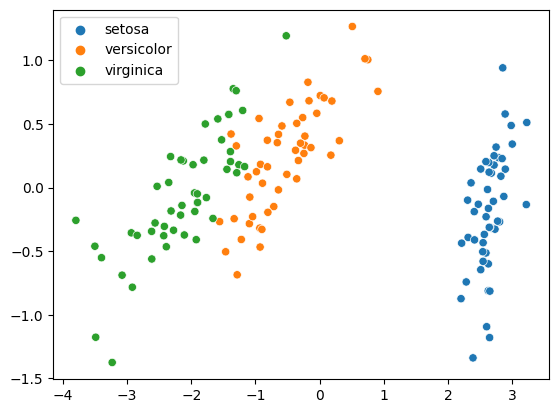

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = sns.load_dataset('iris')

# Extract the features
X = df.iloc[:, :-1].values

# Extract the labels
y = df.iloc[:, -1].values

# Perform PCA
X_pca = pca(X, n_components=2)

# Plot the data
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.show()


### Handwritten digits

The digits dataset has points in $8*8$ space but only ten labels. With PCA we can reduce the dimentionallity significantly and run k-means faster.

In [13]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

import timeit

# Load the data
digits = load_digits()

# Extract the features
X = digits.data

# Perform PCA
X_pca = pca(X, n_components=10)

# Compare the performance of KMeans with and without PCA
print('KMeans with PCA:', timeit.timeit(lambda: KMeans(n_clusters=10, n_init='auto').fit(X_pca), number=100))
print('KMeans without PCA:', timeit.timeit(lambda: KMeans(n_clusters=10, n_init='auto').fit(X), number=100))


KMeans with PCA: 1.5949241000053007
KMeans without PCA: 1.9872723000007682
